In [1]:
#!pip install -U matplotlib

In [2]:
#!pip install sidetable

# Data based decission making_ Increase Revenue of Online Store

## Introduction

As a Analyst at a big online store, together with marketing department I Planned to increase the revenue of the store. For this I need to compiled list of hypotheses, prioritize these, launch an A/B test, and finally analyze the results. So as a plan I divided the whole project in 3 parts. Please use below links to go these parts promptly.



## Table of Contents
<a id='toc'></a>

#### [1. Importing libraries](#implib)
#### [2. Loading the Data](#data)<br>

### [Part I: Priorititzing the Hypotheses](#part1) <br>
 > **[1. Applying ICE - Evaluating Method](#ICE) <br>
 > [2. Applying RICE - Evaluating Method](#RICE) <br>
 > [3. Comparing Results](#ICE-RICE)** <br>
 

### [Part II: A/B Test Analysis](#part2) <br>
 > **[1.Data Preprocessing](#DPP)<br>
 > [2.Exploratory data analysis](#eda)<br>
 > [3.Evaluating the A/B Test results](#abtest)<br>
 > [4.Conclusion and Recommendation](#final)<br>**

### 1. Importing libraries
<a id='implib'></a>
<a id='implib1'></a>

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import scipy.stats as st
import plotly.express as px

from functools import reduce
from io import BytesIO
import requests
import os

import math as mth
import warnings
import sidetable
warnings.filterwarnings("ignore")
%matplotlib inline

---
[back to: chapter start](#implib1) | [back to: table of content](#toc)

### 2. Loading the Data
<a id='data'></a>
<a id='data1'></a>

In [13]:
try:
    hypothesis = pd.read_csv(r'/datasets/hypotheses_us.csv')
    visits = pd.read_csv(r'/datasets/visits_us.csv')
    orders = pd.read_csv(r'/datasets/orders_us.csv')
    
except:
    
    hypotheses_sheet_id = '1Z02EyYWZoz92eYDy7o0YcOYFcOxGWW1iJfoglQdsaEg'
    visits_sheet_id = '1beU0a2B2Ypk7DNGHPyi1fPCWZeS4A-WFwC5qYSYHeUA'
    orders_sheet_id = '1TusiKma1QN5n27KwU2bY-ld79WbDDYoHav7lvvP66ZE'
    
    hypotheses_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(hypotheses_sheet_id)
    visits_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(visits_sheet_id)
    orders_file = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(orders_sheet_id)
    
    r1 = requests.get(hypotheses_file)
    r2 = requests.get(visits_file)
    r3 = requests.get(orders_file)
    
    hypotheses = pd.read_csv(BytesIO(r1.content))
    visits = pd.read_csv(BytesIO(r2.content))
    orders = pd.read_csv(BytesIO(r3.content))
    

---
[back to: chapter start](#data1) | [back to: table of content](#toc)

## Part I: Priorititzing the Hypotheses
<a id='part1'></a>
<a id='part11'></a>

**[1. Applying ICE - Evaluating Method](#ICE1) <br>
[2. Applying RICE - Evaluating Method](#RICE1) <br>
[3. Comparing Results](#ICE-RICE1)** <br>

### 1. Applying ICE - Evaluating Method
<a id='ICE'></a>
<a id='ICE1'></a>

In [20]:
# Calculating ICE Score
hypotheses['ICE'] = round((hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort'],3)

display(hypotheses.sort_values(by= 'ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000,3.0


As we know, hypothesis will cost a lot of money, but our resources are limited. So we need to choose what to test and what to let go of. To try to ensure maximum growth of key business metrics, we will first ensure to prioritized hypotheses. We have various methods of prioritizing hypotheses but here based on the data we will use ICE and RICE frameowrk to prioritized hypothesis.

### 2. Applying RICE - Evaluating Method
<a id='RICE'></a>
<a id='RICE1'></a>

In [25]:
# Calculating RICE Score
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'])/hypotheses['Effort']

display(hypotheses.sort_values(by= 'RICE', ascending = False))
hypotheses.info()

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hypothesis  9 non-null      object 
 1   Reach       9 non-null      int64  
 2   Impact      9 non-null      int64  
 3   Confidence  9 non-null      int64  
 4   Effort      9 non-null      int64  
 5   ICE         9 non-null      float64
 6   RICE        9 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 632.0+ bytes


Top 4 hypotheses in ICE are 8,0,7,6 and in RICE are 7,2,0,6. In both the framework 0, 7 and 6 are the comman hypotheses. The difference is because of reach parameter. Reach parameter is based on the no. of users who will be affected by the change and in our case users plays an important role to increase the revenue so we will consider this factor as well and will plan the hypotheses prioritization accordingly.

### 3. Comparing Results
<a id='ICE-RICE'></a>
<a id='ICE-RICE1'></a>

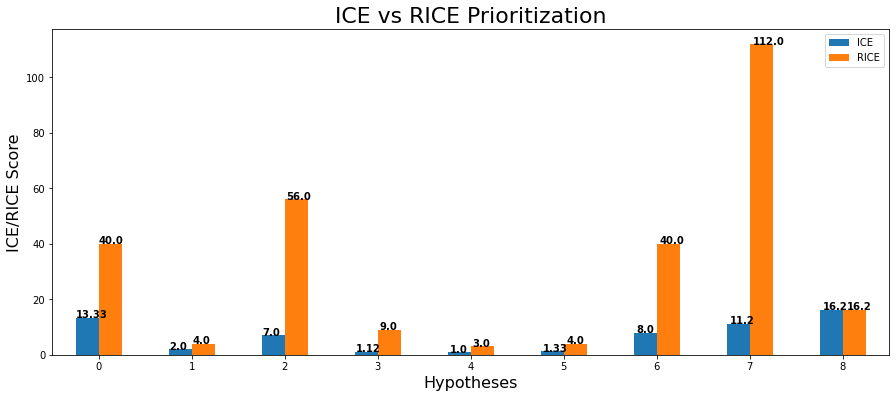

In [122]:
hypotheses_list = ['1','2','3','4','5','6','7','8', '9']
hl_value = pd.Series(hypotheses_list)

hypotheses['number'] = hl_value

# plot the difference


ax = hypotheses[['number','ICE','RICE']].plot(kind='bar',stacked=False, figsize=(15,6))

for p in ax.patches:
    ax.annotate(str(p.get_height().round(2)), 
                (p.get_x() * 1.005, 
                 p.get_height() * 1.00005), 
                 weight='bold')
    
plt.title('ICE vs RICE Prioritization', size= 22)
plt.xlabel('Hypotheses', size= 16)
plt.ylabel('ICE/RICE Score', size= 16)
plt.xticks(rotation= 0)
plt.legend()
plt.show()




#display(hypotheses)

As we can see from the above graph there is a difference between the RICE and ICE score, which is due to the reach parameter. In RICE reach parameter is also consider apart from other parameters. So we can say when we have high reach parameter, it shift the whole RICE score to highest level. for example hypotheses 7 have reach value as 10 which make this hypotheses as highest score value. While ICE consider impact, confidence and effort only. The highest impact, confidence and lowest effort makes ICE score high like hypotheses no 8 is the highest for ICE.

---
[back to: chapter start](#part11) | [back to: table of content](#toc)

## Part II: A/B Test Analysis
<a id='part2'></a>
<a id='part21'></a>

### 1. Data Preprocessing
<a id='DPP'></a>
<a id='DPP1'></a>

In [85]:
# Getting familiar with the dataset

print('for visits dataset:')
print()
display(visits.head(10), visits.info(), visits.stb.missing(style= True))
print()
print('for order dataset:')
print()
display(orders.head(10), orders.info(), orders.stb.missing(style=True))




for visits dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


None

,missing,total,percent
date,0,62,0.00%
group,0,62,0.00%
visits,0,62,0.00%



for order dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


None

,missing,total,percent
transactionId,0,"1,197",0.00%
visitorId,0,"1,197",0.00%
date,0,"1,197",0.00%
revenue,0,"1,197",0.00%
group,0,"1,197",0.00%


No missing values are found

In [109]:
# Data Preprocessing

visits['date'] = visits['date'].astype('datetime64[D]')
orders['date'] = orders['date'].astype('datetime64[D]')

orders[['transactionId','visitorId']] = orders[['transactionId','visitorId']].astype('str')

visits = visits.drop_duplicates()
#visits = visits.dropna()

orders = orders.drop_duplicates()
#orders = orders.dropna()



display(visits.info(),orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 56.1+ KB


None

None

---
[back to: chapter start](#DPP1) | [back to: table of content](#toc)

### 2. Exploratory data analysis
<a id='eda'></a>
<a id='eda1'></a>

[2.1 Graph cumulative revenue by group](#21)<br>
[2.2 Graph cumulative average order size by group](#22)<br>
[2.3 Graph the relative difference in cumulative average order size for group B compared with group A](#23)<br>
[2.4 Calculate each group's conversion rate as the ratio of orders to the number of visits for each day](#24)<br>
[2.5 Scatter chart of the number of orders per user](#25)<br>
[2.6 Calculate the 95th and 99th percentiles for the number of orders per user](#26)<br>
[2.7 Scatter chart of order prices](#27)<br>
[2.8 Calculate the 95th and 99th percentiles of order prices](#28)<br>

### 2.1 Graph cumulative revenue by group
<a id='21'></a>

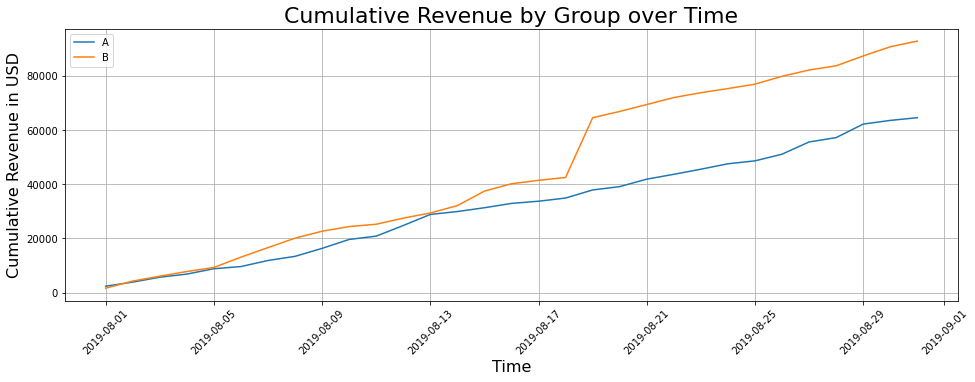

,date,group,revenue
0,2019-08-01,A,2356.8
1,2019-08-01,B,1620.0
2,2019-08-02,A,3860.3
3,2019-08-02,B,4243.8
4,2019-08-03,A,5675.5
...,...,...,...
57,2019-08-29,B,87343.0
58,2019-08-30,A,63563.5
59,2019-08-30,B,90736.3
60,2019-08-31,A,64554.9


In [140]:
group_dates = orders[['date','group']].copy()
group_dates = group_dates.drop_duplicates()

ordersAgg = group_dates.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : pd.Series.nunique, 
          'visitorId' : pd.Series.nunique, 
          'revenue' : 'sum'}), axis= 1).sort_values(by= ['date','group'])
ordersAgg = ordersAgg.rename(columns= {'transactionId':'orders', 'visitorId':'buyers'})

visitsAgg = group_dates.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'visits' : 'sum'}), axis= 1).sort_values(by=['date','group'])

cumulativeData = ordersAgg.merge(visitsAgg, left_on= ['date', 'group'],  right_on= ['date','group'])
cumulativeData.columns = ['date','group','orders','buyers','revenue','visitors']
#

cumRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue','orders']]
cumRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue','orders']]


plt.figure(figsize= (16,5))

plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label= 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label= 'B')

plt.legend()
plt.title('Cumulative Revenue by Group over Time', size= 22)
plt.xlabel('Time', size= 16)
plt.ylabel('Cumulative Revenue in USD', size= 16)
plt.xticks(rotation= 45)
plt.grid()
plt.show()

display(cumulativeData[['date','group','revenue']])

#display(ordersAgg, visitsAgg)
#display(group_dates, group_dates.drop_duplicates())

As we can see from the chart above, the cumulative revenue keeps on increasing for both groups but after 17th of  August, there is a peak in revenue for group B. After that also group B keeps higher increase in revenue as compare to group A.

### 2.2 Graph cumulative average order size by group
<a id='22'></a>

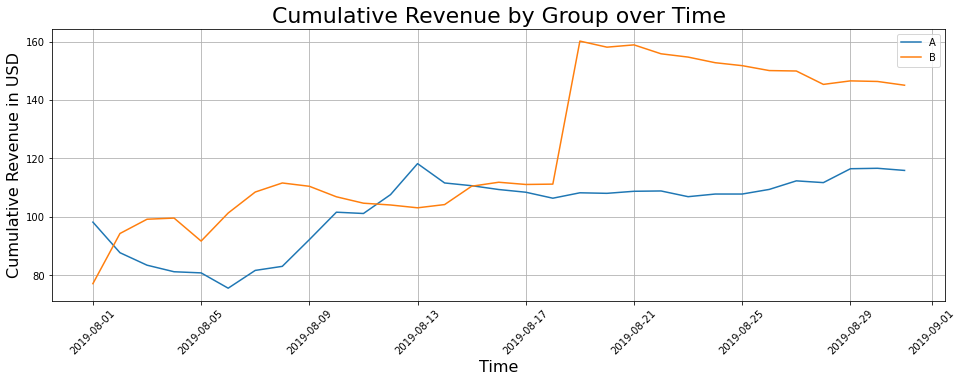

In [141]:
plt.figure(figsize=(16,5))

plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label= 'A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label= 'B')

plt.legend()
plt.title('Cumulative Revenue by Group over Time', size= 22)
plt.xlabel('Time', size= 16)
plt.ylabel('Cumulative Revenue in USD', size= 16)
plt.xticks(rotation= 45)
plt.grid()
plt.show()

Group B cumulative average sales drastically increase after 17th of August, this might have been due to the presence of large, expensive orders. It's decreasing at later stage, however, it's cumulative revevue is still increasing. <br>
Also Group A average sales increase in the first quarter but later it becomes steady. <br>
At the end, both group's cumulative average sales become steady.

### 2.3  Graph the relative difference in cumulative average order size for group B compared with group A
<a id='23'></a>

In [142]:
mergedCumRevenue = cumRevenueA.merge(cumRevenueB, left_on='date', right_on='date', how='left', suffixes= ['A', 'B'])
# display(mergedCumRevenue)

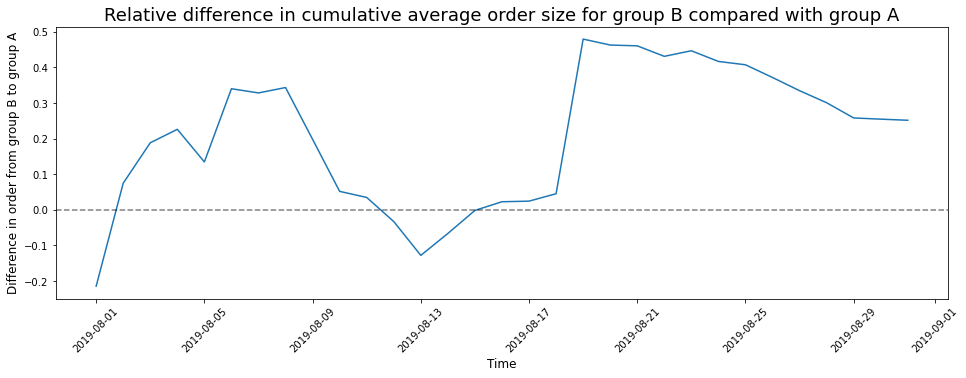

In [229]:
# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize= (16,5))

plt.plot(mergedCumRevenue['date'], (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])/(mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y= 0, color= 'black', linestyle= '--', alpha= .5) 
plt.title('Relative difference in cumulative average order size for group B compared with group A', size= 18)
plt.xlabel('Time', size= 12)
plt.ylabel('Difference in order from group B to group A', size= 12)
plt.xticks(rotation= 45)
plt.show()

We can see from the graph above the relative difference in cumulative average order size for group B, compared with group A is sudden become high after 17th of August but later it starts to decline and at the end it becomes steady.

### 2.4 Calculate each group's conversion rate as the ratio of orders to the number of visits for each day
<a id='24'></a>

In [228]:
# display(ordersAgg.merge(visitsAgg, left_on=['date', 'group'], right_on=['date', 'group']))
# display(ordersAgg)

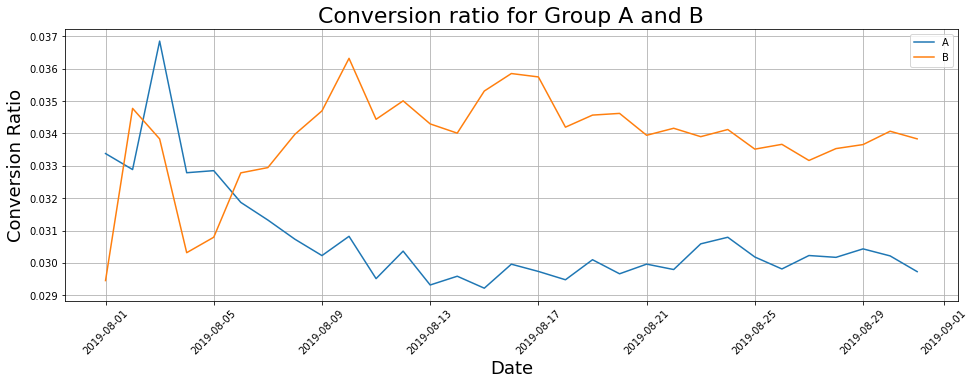

,date,group,orders,buyers,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


In [227]:
# Merging order and visit table and then caculate conversion.
orders_vists_cum_data = ordersAgg.merge(visitsAgg, left_on= ['date', 'group'], right_on= ['date', 'group'])
orders_vists_cum_data['conversion'] = orders_vists_cum_data['orders']/orders_vists_cum_data['visits']



# selecting data on group A 
orders_vists_cum_data_A = orders_vists_cum_data[orders_vists_cum_data['group']=='A']

# selecting data on group B
orders_vists_cum_data_B = orders_vists_cum_data[orders_vists_cum_data['group']=='B']

#set the figure size
plt.figure(figsize= (16,5))

# plotting the graphs
plt.plot(orders_vists_cum_data_A['date'], orders_vists_cum_data_A['conversion'], label='A')
plt.plot(orders_vists_cum_data_B['date'], orders_vists_cum_data_B['conversion'], label='B')
plt.legend()

plt.title('Conversion ratio for Group A and B', size= 22)
plt.xlabel('Date', size= 18)
plt.ylabel('Conversion Ratio', size= 18)
plt.xticks(rotation= 45)
plt.grid()
plt.show()

display(orders_vists_cum_data)

Conversion ratio for both group increase drastically initially and then decrease but after 8 of May for Group B again it starts to increase and fluctuate among some interval. Speaking of Group A, it decreases and fluctuate among some interval, but in a more soften manner.

Overall Group A conversion is low as compare to Group B. In addition, it does not seems to be stabilize till the end so it might be too early to draw conclusions about the test. In this case, first we can have a look at the anomalies, they might change the picture in some way.

### 2.5 Scatter chart of the number of orders per user
<a id='25'></a>

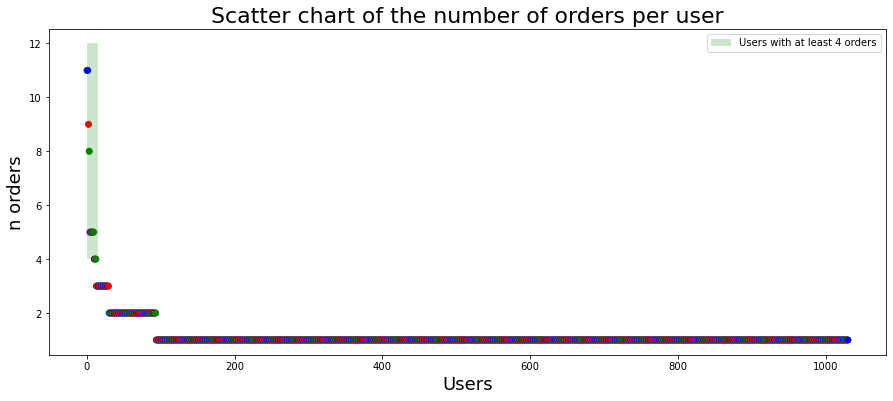

,users,orders
0,4256040402,11
1,2458001652,11
2,2378935119,9
3,2038680547,8
4,3062433592,5
5,3803269165,5
6,3717692402,5
7,237748145,5
8,1230306981,5
9,199603092,5


In [225]:
orders_per_users = orders.groupby('visitorId').agg({'transactionId': pd.Series.nunique}).sort_values(by='transactionId', ascending=False).reset_index()
orders_per_users.columns = ['users','orders']

plt.figure(figsize= (15,6))

xVal = range(0, len(orders_per_users))

cateVal = 0
categories = [0 for i in range(0, len(orders_per_users))] # declaring category array and setting default value as 0.
for i in range(0, len(orders_per_users)):
    cateVal = cateVal+1
    if (cateVal>2):
        cateVal = 0
    categories[i] = cateVal
colormap = np.array(['r', 'g', 'b'])

plt.scatter(xVal, orders_per_users['orders'], c= colormap[categories])

plt.title('Scatter chart of the number of orders per user', size= 22)
plt.xlabel('Users', size= 18)
plt.ylabel('n orders', size= 18)
#plt.vlines(15, 
#           linestyles= 'dashed', 
#           colors= 'grey', 
#           alpha= 0.5, 
#           ymin= 0, 
#           ymax= 12, 
#           label= 'Users with at 4 orders')

plt.axes()
rectangle = plt.Rectangle((0,4),15,8, fc= 'green', alpha= 0.2,label= 'Users with at least 4 orders')
plt.gca().add_patch(rectangle)
plt.legend()
plt.show()

display(orders_per_users.head(15))

The above graph shows ***n*** orders per user. As we can see from the above graph, most of the users order between 1 and 2 and very few of them order above 4.

### 2.6 Calculate the 95th and 99th percentiles for the number of orders per user
<a id='26'></a>

In [179]:
print(f'Number of order per user in percentiles - [95, 99]: {np.percentile(orders_per_users.orders, [95, 99])}')

Number of order per user in percentiles - [95, 99]: [2. 4.]


Not more than `5%` of users placed more than 2 orders, and only `1%` of users made more than 4 orders. On this point forward, we'll using thoses percentiles, so we are able to define the points at which a data point becomes an anomaly like `1%` in this particular case.

### 2.7 Scatter chart of order prices
<a id='27'></a>

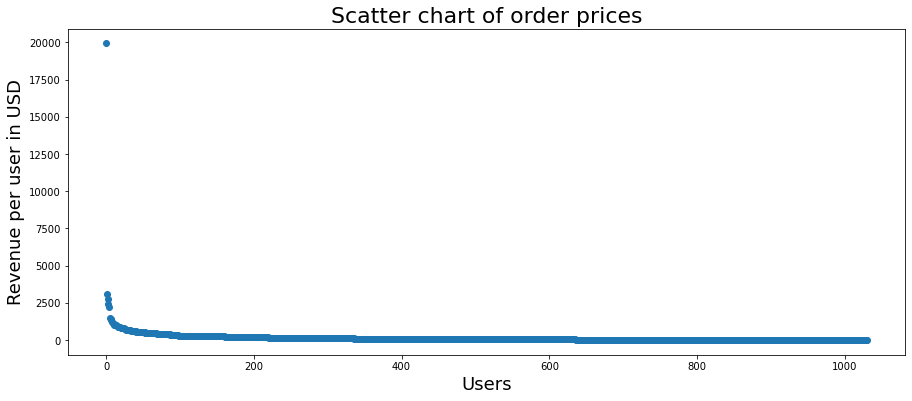

In [224]:
revenue_per_users = orders.groupby('visitorId').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False).reset_index()
revenue_per_users.columns = ['users','revenue']

plt.figure(figsize= (15,6))
x_values = pd.Series(range(0, len(revenue_per_users['revenue'])))

plt.scatter(x_values, revenue_per_users['revenue'])
plt.title('Scatter chart of order prices', size= 22)
plt.xlabel('Users', size= 18)
plt.ylabel('Revenue per user in USD', size= 18)



plt.show()

The above chart also shows that there are very few users whose generate more than 2500 dollar revenue.

### 2.8 Calculate the 95th and 99th percentiles of order prices
<a id='28'></a>

In [207]:
print(f'Percintiles of the order amount for [95%, 99%]: {np.percentile(revenue_per_users.revenue, [95, 99])} in USD')

Percintiles of the order amount for [95%, 99%]: [ 510.35 1047.24] in USD


We can see now only very small fraction. hence less than `1%` of users generate revenue more than 2500 dollars.

---
[back to: chapter start](#eda1) | [back to: table of content](#toc)

### 3. Evaluating the A/B Test results
<a id='abtest'></a>
<a id='abtest1'></a>

[3.1 Statistical significance of the difference in conversion between the groups - raw data](#31)<br>
[3.1.1 Conclusions and conjetures](#311)<br>
[3.2 Statistical significance of the difference in average order size between the groups - raw data](#32)<br>
[3.2.1 Conclusions and conjetures](#312)<br>
[3.3 Statistical significance of the difference in conversion between the groups - filtered data](#33)<br>
[3.3.1 Conclusions and conjetures](#313)<br>
[3.4 Statistical significance of the difference in average order size between the groups - filtered data](#34)<br>
[3.4.1 Conclusions and conjetures](#314)<br>

### 3.1 Statistical significance of the difference in conversion between the groups - raw data
<a id='31'></a>

**H<sub>0</sub>**: There is **no** statistically significant difference in average order size between the Group A and B based on raw data. <br>
**H<sub>1</sub>**: There is **a** statistically significant difference in average order size between the Group A and B based on raw data.

In [223]:
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_usersA.columns = ['userId', 'orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_by_usersB.columns = ['userId', 'orders']

sampleA = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])), name='orders')],axis=0)

results = st.mannwhitneyu(sampleA, sampleB)
ratio_group_conversion = (sampleB.mean()/sampleA.mean()-1)

alpha = .05 #significance level

print("p-value: {0:.3f}".format(results.pvalue))
print("{0:.3f}".format(ratio_group_conversion))
print()
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.008
0.138

Null hypothesis rejected: the difference is statistically significant


### 3.1.1 Conclusions and conjetures
<a id='311'></a>

As we can see p-value is less than significance value which implies 'Null hypothesis rejected' i.e. There is a statistically significant difference in conversion between the group A and B based on raw data. Also Group B relative conversion seems to be higher than Group A which is around `13.8%`

### 3.2 Statistical significance of the difference in average order size between the groups - raw data
<a id='32'></a>

**H<sub>0</sub>**: There is **no** statistically significant difference in average order size between the Group A and B based on raw data. <br>
**H<sub>1</sub>**: There is **a** statistically significant difference in average order size between the Group A and B based on raw data.

In [222]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
avg_ordersize_groups = (orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

alpha = .05 #significance level

print("p-value: {0:.3f}".format(results.pvalue))
print('Relative average order size of Group B over Group A: {0:.3f}'.format(avg_ordersize_groups))
print()

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.346
Relative average order size of Group B over Group A: 0.252

Failed to reject the null hypothesis: we can't make conclusions about the difference


### 3.2.1 Conclusions and conjetures
<a id='312'></a>

The p-value is greater than significance value which implies 'Failed to reject Null hypothesis' i.e. There is no statistically significant difference in average order size between the Group A and B based on raw data. Also Group B relative average order size is better than Group A i.e approx `25.2%` higher than Group A.

### 3.3  Statistical significance of the difference in conversion between the groups - filtered data
<a id='33'></a>

**H<sub>0</sub>**: There is **no** statistically significant difference in conversion between the group A and B based on filtered data. <br>
**H<sub>1</sub>**: There is **a** statistically significant difference in conversion between the group A and B based on filtered data.

In [221]:
order_lim = np.percentile(orders_per_users['orders'], 95)
revenue_lim = 1000 #np.percentile(revenuePerUsers['revenue'], 99)

users_with_high_orderrate = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > order_lim]['userId'], 
                                 orders_by_usersB[orders_by_usersB['orders'] > order_lim]['userId']], axis = 0)
users_with_high_order_amount = orders[orders['revenue'] > 1000]['visitorId']
abnormal_users = pd.concat([users_with_high_orderrate, users_with_high_order_amount], axis = 0).drop_duplicates().sort_values()



sampleA_filtered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['userId'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['orders'])),name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['userId'].isin(abnormal_users))]['orders'],
                             pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['orders'])),name='orders')],axis=0) 
results = st.mannwhitneyu(sampleA_filtered, sampleB_filtered)

alpha = .05 #significance level

print("p-value: {0:.3f}".format(results.pvalue))
print("{0:.3f}".format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))
print()
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.005
0.174

Null hypothesis rejected: the difference is statistically significant


### 3.3.1 Conclusions and conjetures
<a id='313'></a>

As we can see p-value is less than significance value which implies 'Null hypothesis rejected' i.e. There is a statistically significant difference in conversion between the group A and B based on filtered data. Also we can say that the results for conversion almost didn't change after removing the outliers. now we can see after removing the outliers Group B relative increase in conversion is `17.4%` rather than `13.8%`.

### 3.4 Statistical significance of the difference in average order size between the groups - filtered data
<a id='34'></a>

**H<sub>0</sub>**: There is **no** statistically significant difference in average order size between the group A and B based on filtered data. <br>
**H<sub>1</sub>**: There is **a** statistically significant difference in average order size between the group A and B based on filtered data.

In [220]:
results = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])


alpha = .05 #significance level

print('p-value: {0:.3f}'.format(results.pvalue))
print('{0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1)) 

print()
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

p-value: 0.419
-0.022

Failed to reject the null hypothesis: we can't make conclusions about the difference


### 3.4.1 Conclusions and conjetures
<a id='314'></a>

The p-value is greater than significance value which implies 'Failed to reject Null hypothesis' i.e. There is no statistically significant difference in average order size between the group A and B based on filtered data, which is same as earlier without removing outlier, but the relative difference of average order size for Group B is now decreasing as compare to Group A. This is how anomalies changed the conclusion.

---
[back to: chapter start](#abtest1) | [back to: table of content](#toc)

### 4. Decision based on the results
<a id='final'></a>

**The possible decisions are:**
1. Stop the test, consider one of the groups the leader
2. Stop the test, conclude that there is no difference between the groups
3. Continue the test

**Below are the facts for making our conclusion:**

1. All Cumulative matrics shows better result for Group B.
2. There is a statistically significant differences in conversion between the Groups A and B for both raw and filtered data. Group B's conversion is higher than Group A.
3. Neither raw nor filtered data revealed any statistically significant differences in average order size between the groups.
4. The graphs showing the difference in conversion between the groups tells us that Group B's results are better as compare to Group A but it does not seems to be stabilize till the end .
5. The graph showing the difference in cumulative average order size between the groups tells us that group B's results are better and at the end it starting to becomes steady.

Based on all above points we can say that for maximum matrics Group B is better than Group A. Now we can stop the test, considering Group B is better and can also provide recommendation to marketing department that Group B is better so we can invest in this Group for more revenues/profits.

[back to top](#top)